## **PMI plot**

A ternary plot of and Principal Moments of Inertia (PMI) was used to analyze molecular geometry. A low energy conformation was calculated using the MMFF94x force field implemented in Molecular Operating Environment, and the three principal moments of inertia, I1, I2 and I3 were determined. Their respective normalized PMI ratios, npr1 = I1/I3 and npr2 = I2/I3, 

In [1]:
import pandas as pd
from rdkit import Chem

In [2]:
df = pd.read_csv('PMI_STADS.csv')

In [3]:
df.head(1)

,molecule_chembl_id,pIC50,npr1,npr2,SMILES
0,CHEMBL109420,5.173925,0.312183,0.758777,CC(=O)N(C)Cc1cc(C(=O)N(C)Cc2cc3ccccc3n2C)ccc1N


In [ ]:
!pip install python-ternary
!pip install scikit-image

In [4]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

In [5]:
def ensure_white_background(image_path):
    # Open the image and ensure it has an RGBA mode (which includes alpha)
    img = Image.open(image_path).convert("RGBA")
    
    # Create a blank image with a white background
    white_bg = Image.new("RGBA", img.size, (255, 255, 255, 255))
    
    # Alpha composite the original PNG onto the white background
    white_bg.alpha_composite(img)
    
    # Convert back to RGB if you don’t need the alpha channel anymore
    return white_bg.convert("RGB")

# Usage example in your add_png_image function
def add_png_image(ax, image_path, coords, zoom=1.0, zorder=10):
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    
    # Use the helper function above to ensure the background is white
    img = ensure_white_background(image_path)

    im = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(im, coords, frameon=False, xycoords='data', zorder=zorder)
    ax.add_artist(ab)


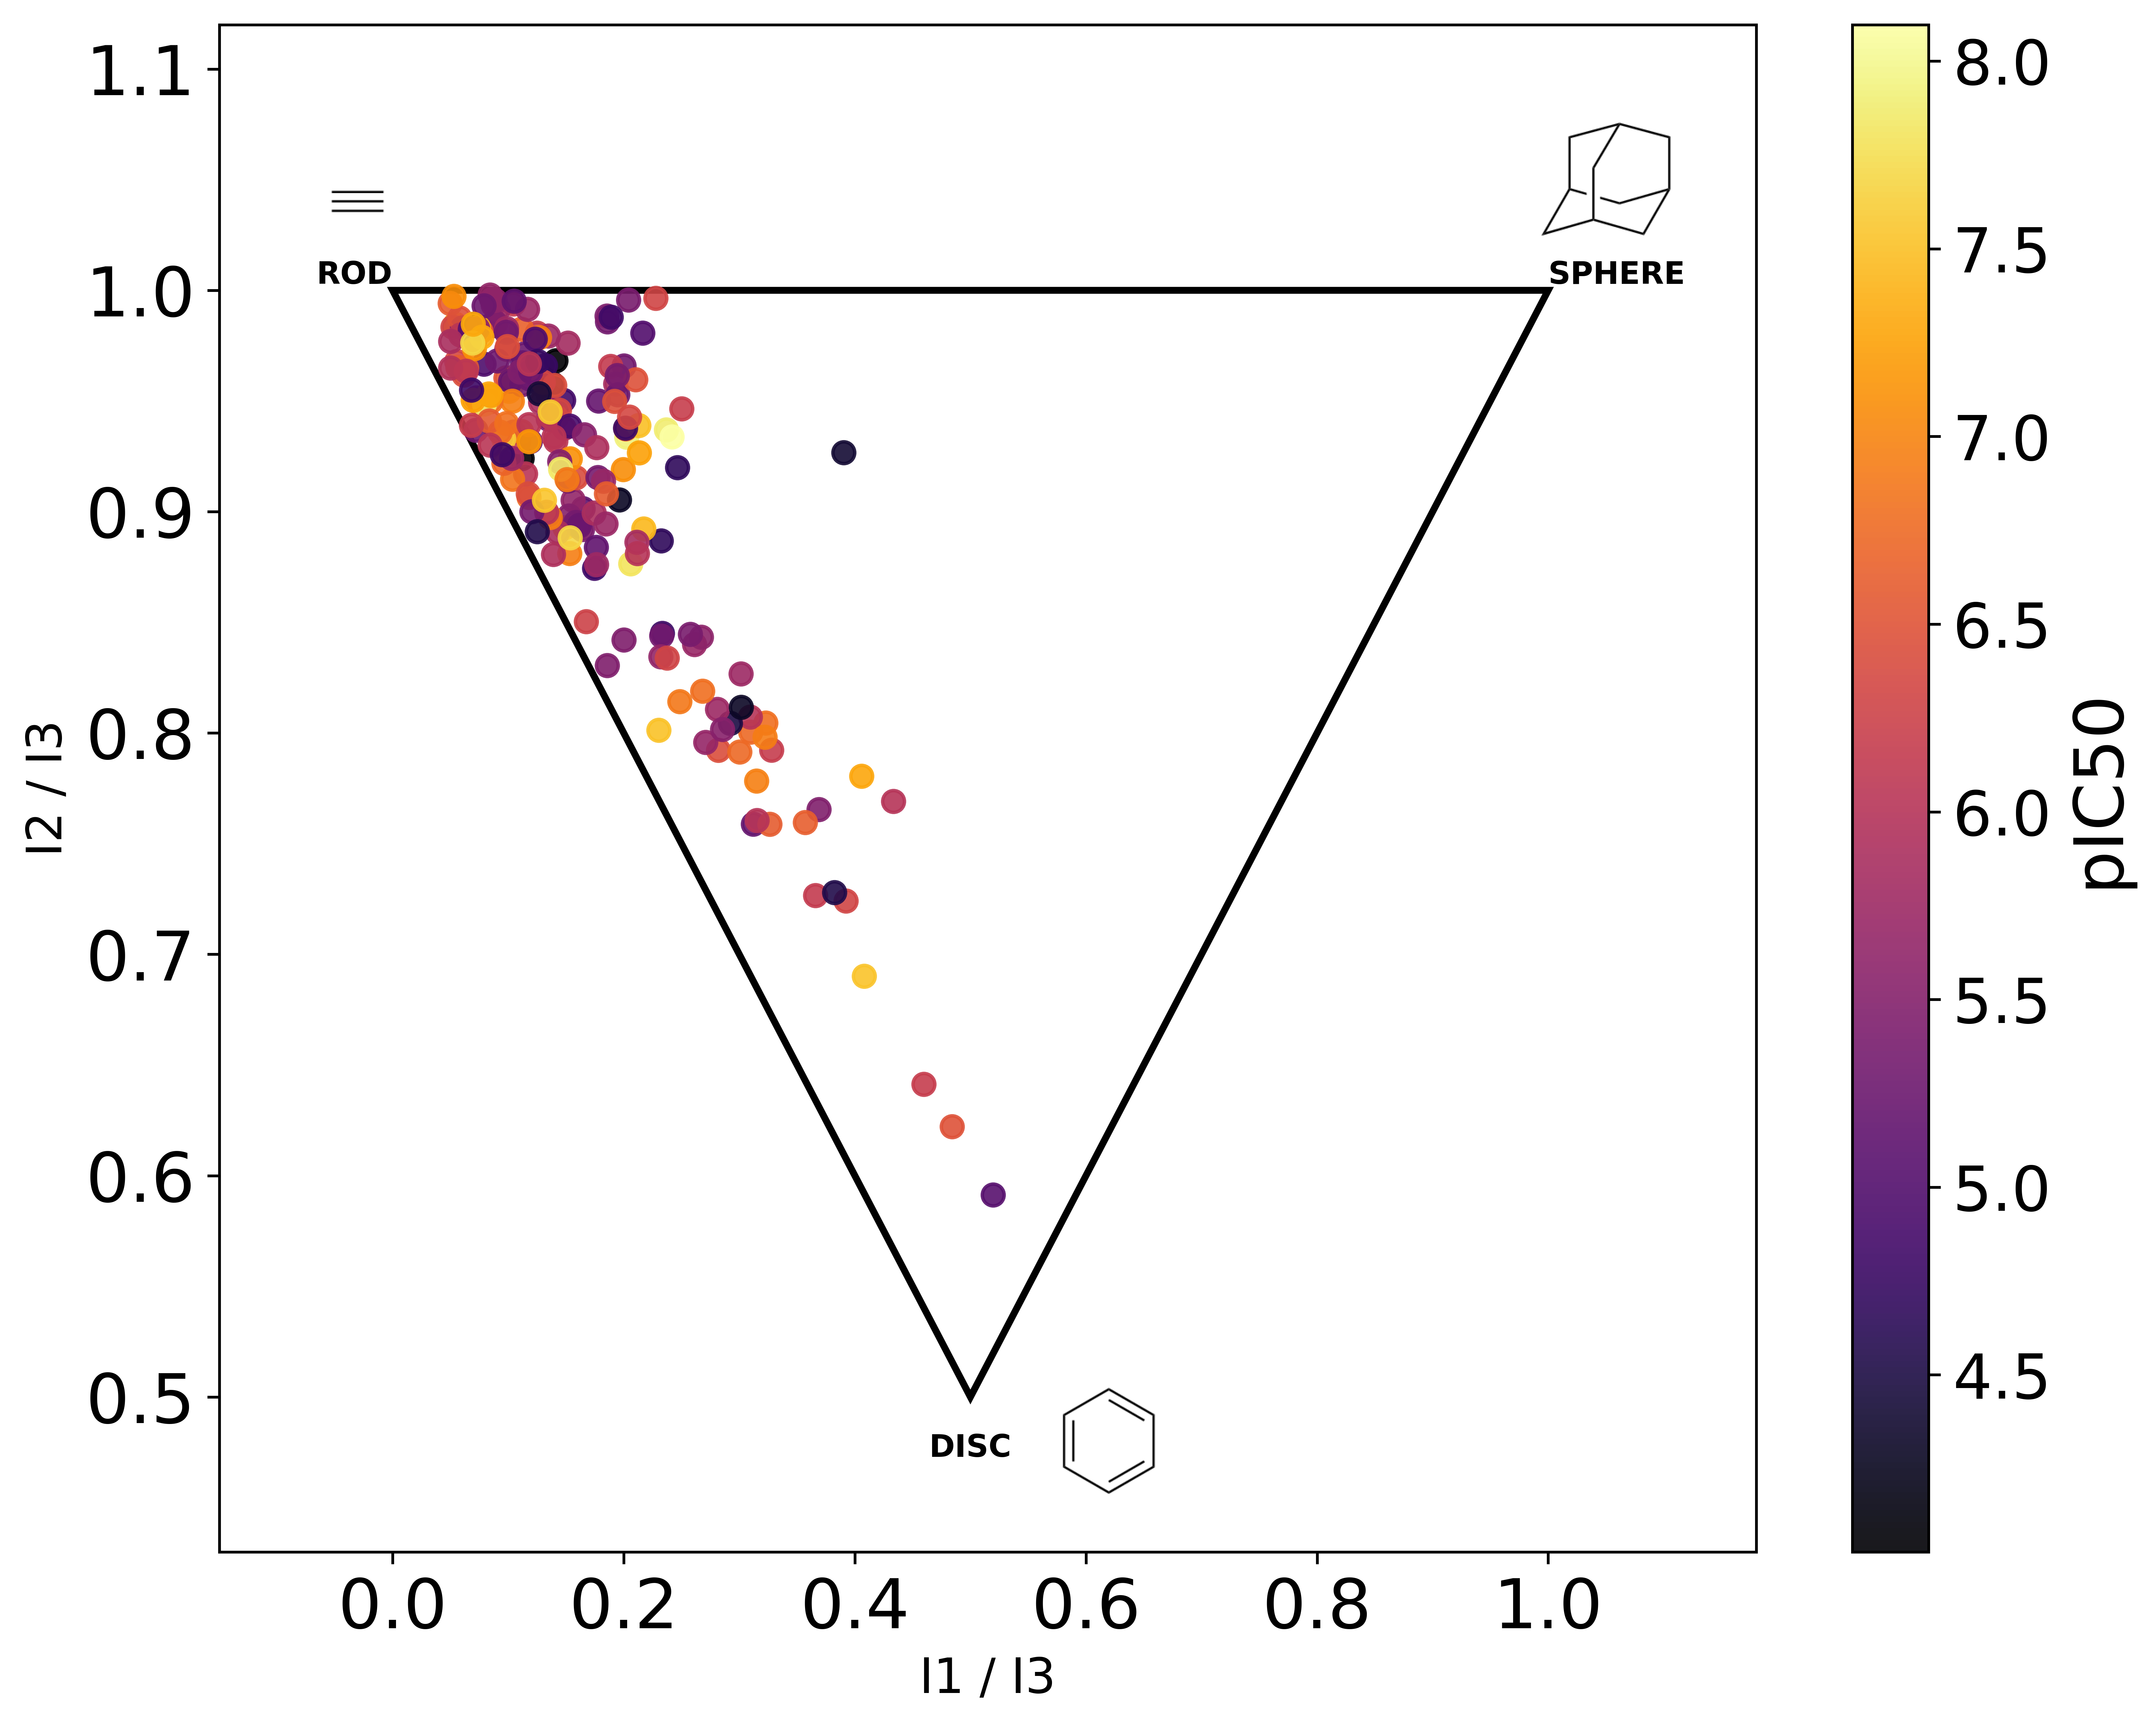

In [6]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8), dpi=800)
# Use the original triangle vertices (0, 1), (0.5, 0.5), (1, 1)
triangle_vertices = [(0, 1), (0.5, 0.5), (1, 1)]

# Plot the triangular boundary using the original vertices
triangle = plt.Polygon(triangle_vertices, fill=None, edgecolor='black', linewidth=2)
ax.add_patch(triangle)

# Plot the data points from the DataFrame, colored by the 'pIC50' column
sc = ax.scatter(df['npr1'], df['npr2'], c=df['pIC50'], cmap='inferno', s=40, alpha=0.9)

# Adjust axis limits to provide space around the triangle without changing the vertices
ax.set_xlim(-0.15, 1.18)  # Extend the x-axis to create space
ax.set_ylim(0.43, 1.12)  # Extend the y-axis further to create space for images

# Modify the size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=20)  # Change to desired font size
ax.tick_params(axis='both', which='minor', labelsize=20)  # Optional for minor ticks

# Set axis labels
ax.set_xlabel('I1 / I3', fontsize=14)
ax.set_ylabel('I2 / I3', fontsize=14)

# Label the triangle vertices for clarity
ax.text(0, 1, 'ROD', fontsize=9, verticalalignment='bottom', horizontalalignment='right', color='black', weight='bold')
ax.text(0.5, 0.47, 'DISC', fontsize=9, verticalalignment='bottom', horizontalalignment='center', color='black', weight='bold')
ax.text(1, 1, 'SPHERE', fontsize=9, verticalalignment='bottom', horizontalalignment='left', color='black', weight='bold')

# Add the pre-made PNG images of molecular structures near the vertices using PIL to load the images
add_png_image(ax, 'your_path/rod.png', (-0.03, 1.04), zoom=0.25)  # Adjust the path and zoom
add_png_image(ax, 'your_path/disc.png', (0.62, 0.48), zoom=0.25)
add_png_image(ax, 'your_path/sphere.png', (1.05, 1.05), zoom=0.25)

# Remove the grid for a cleaner look
ax.grid(False)

# Specific customization for the color bar
cbar = plt.colorbar(sc, ax=ax, label='pIC50')
cbar.ax.set_ylabel('pIC50', fontsize=20)  # Set font size for the color bar label
cbar.ax.tick_params(labelsize=18)  # Set font size for the color bar tick labels

# Show the plot
plt.show()

In [11]:
# Save the figure with high resolution
plt.savefig('PMI_saureus_STADS.png', dpi=600, bbox_inches='tight')

# Display the plot
plt.show()


<Figure size 640x480 with 0 Axes>